<a href="https://colab.research.google.com/github/matro-eugene-jose/COSC110_Matro-Eugene-Jose/blob/main/lab1_titanic_Matro%2CEugene_Jose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratory Activity 1: Computational Thinking with the Titanic Dataset using Python - Eugene Jose Matro (BSCS 4C)**

Loading dataset

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/titanic.csv")

# Display the first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Question 1 --- Up to this point, determine the underlying tasks needed to be done for loading and handling the data based on the steps described in this part? Write this as a text in your Colab notebook.

1. Import the required library: Pandas.
2. Load the dataset from a CSV file using `pd.read_csv("titanic.csv")`.
3. Inspect the first few rows of the dataset using `df.head()`.
4. Identify the structure of the dataset:
  - Check column names and types: `df.info()`.
  - Perform basic statistical analysis: `df.describe()`.

In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Question 2 --- Using computation thinking, determine the blank values in the data. Write the algorithm as a text in your Google Colab.
  - Which columns contain missing values? Should we remove or fill them?

In [3]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Columns with blank values:

- Cabin (687 blanks - remove because too much inconsistent data)
- Age (177 blanks - keep and fill because necessary for statistics)
- Emabarked (2 blanks - keep and fill because not too much missing data)

In [4]:
df.drop(columns=["Cabin"], inplace=True)
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

<ipython-input-4-0e76dc83e18b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
<ipython-input-4-0e76dc83e18b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

Checking new values using `df.info()`

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Step-by-Step:
1. Use `df.isnull().sum()` to detect missing values in each column.
2. Identify which columns have missing values and how significant they are.
3. Make a decision:
  
  A. If a column has excessive missing values, it could be removed.

  B. If missing values are minor, fill them.

4. Implement and verify that missing values are handled properly `df.info()`.

## Question 3 --- Using computation thinking, determine the survival rate of all passengers in the dataset. Write the algorithm as a text in your Google Colab.
  - What can you deduce on the survival rate of the passengers?

In [6]:
df["Survived"].mean()

0.3838383838383838

Step-by-Step:
1. Retrieve survival data from the dataset.
2. Compute the proportion of passengers who survived using `df["Survived"].mean()`.
3. Interpret the result:
  
  A. If the value is above 0.5, survival was more likely.

  B. If below 0.5, the majority did not survive.

The mean for survivors is `0.38` meaning a lot of people died.

## Question 4 --- Using computation thinking, determine the average age of the survivors and non-survivors in the dataset. Write the algorithm as a text in your Google Colab.
  - Does age impact survival? How?

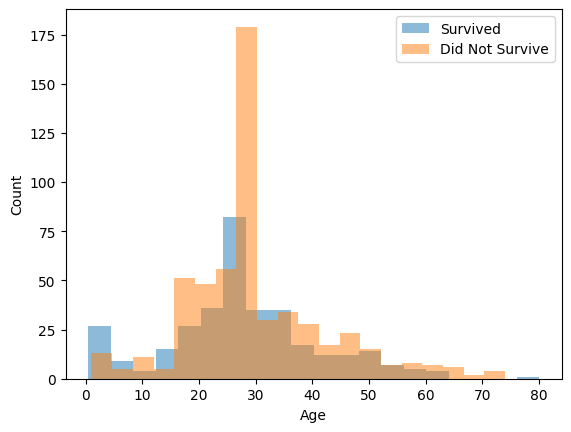

In [7]:
import matplotlib.pyplot as plt

# Plot age distribution of survivors vs. non-survivors
plt.hist(df[df["Survived"] == 1]["Age"].dropna(), bins=20, alpha=0.5, label="Survived")
plt.hist(df[df["Survived"] == 0]["Age"].dropna(), bins=20, alpha=0.5, label="Did Not Survive")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Step-by-Step:
1. Divide the Dataset
  - Extract the ages of passengers who survived: `df[df["Survived"] == 1]["Age"]`.
  - Extract the ages of those who did not survive: `df[df["Survived"] == 0]["Age"]`.
2. Compute the Average Age
  - Use the `.mean()` function to calculate the average age for both groups.
3. Compare the Results
  - If the survivors have a lower average age, it suggests that younger passengers had a better chance of survival.
  - If there’s no significant difference, age might not have been a crucial factor in survival.

In [8]:
df[df["Survived"] == 1]["Age"]

,Age
1,38.0
2,26.0
3,35.0
8,27.0
9,14.0
...,...
875,15.0
879,56.0
880,25.0
887,19.0


In [9]:
df[df["Survived"] == 0]["Age"]

,Age
0,22.0
4,35.0
5,28.0
6,54.0
7,2.0
...,...
884,25.0
885,39.0
886,27.0
888,28.0


In [13]:
# Calculate the average age of survivors
average_age_survived = df[df["Survived"] == 1]["Age"].mean()

# Calculate the average age of non-survivors
average_age_not_survived = df[df["Survived"] == 0]["Age"].mean()

# Display the results
print("Average Age of Survivors:", average_age_survived)
print("Average Age of Non-Survivors:", average_age_not_survived)

Average Age of Survivors: 28.29143274853801
Average Age of Non-Survivors: 30.028233151183972


Does age impact survival:
Age does not affect survival. Most people at that age are in the lower section and the lack of life boats. The priority of children being first to board the life boats affected the survivability of adults and most adults jump the boat and didn't survived long in the freezing water temperature.